# Maxcut problem

## Solving maxcut problem on a random weighted graph using grove

In [1]:
import numpy as np
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa

from pyquil.api import WavefunctionSimulator

import pyquil.api as api
qvm_connection = api.QVMConnection()

In [2]:
graphx = [(0,1),(1,2),(2,0),(0,3)]

In [3]:
inst_maxcut = maxcut_qaoa(graph=graphx)
betas, gammas = inst_maxcut.get_angles()
print("Values of betas:", betas)
print("Values of gammas:", gammas)

                     models will be ineffective
	Parameters: [1.11634178 1.68516146] 
	E => -1.6227002711153107
	Parameters: [1.05143819 1.86151557] 
	E => -1.8336476049495696
	Parameters: [1.17475502 2.02807222] 
	E => -2.0167903760385504
	Parameters: [1.10660624 2.46405877] 
	E => -2.114727345076276
	Parameters: [1.10660624 2.46405877] 
	E => -2.060059837733875
	Parameters: [1.10660624 2.46405877] 
	E => -2.108547708266345
	Parameters: [1.10660624 2.46405877] 
	E => -2.1116960126530873
	Parameters: [1.02872193 2.42486896] 
	E => -2.1230466040647404
	Parameters: [1.02872193 2.42486896] 
	E => -2.1248882246962797
	Parameters: [1.02872193 2.34648936] 
	E => -2.128418098021486
	Parameters: [0.97679906 2.42486896] 
	E => -2.1258787474200984
	Parameters: [0.97679906 2.42486896] 
	E => -2.1286215116522427
	Parameters: [1.0027605  2.36608426] 
	E => -2.1299751134269997
	Parameters: [0.98328942 2.37098299] 
	E => -2.130180711090373
	Parameters: [0.98491201 2.39670129] 
	E => -2.13049276802229

In [4]:
angles = np.hstack((betas, gammas))
print(angles)

[0.98344154 2.38809025]


In [5]:
param_prog = inst_maxcut.get_parameterized_program()
prog = param_prog(angles)
print(prog)
print("Number of gates:", len(prog))

H 0
H 1
H 2
H 3
CNOT 0 1
RZ(2.388090254289451) 1
CNOT 0 1
X 0
PHASE(1.1940451271447254) 0
X 0
PHASE(1.1940451271447254) 0
CNOT 0 2
RZ(2.388090254289451) 2
CNOT 0 2
X 0
PHASE(1.1940451271447254) 0
X 0
PHASE(1.1940451271447254) 0
CNOT 0 3
RZ(2.388090254289451) 3
CNOT 0 3
X 0
PHASE(1.1940451271447254) 0
X 0
PHASE(1.1940451271447254) 0
CNOT 1 2
RZ(2.388090254289451) 2
CNOT 1 2
X 0
PHASE(1.1940451271447254) 0
X 0
PHASE(1.1940451271447254) 0
H 0
RZ(-1.9668830742312273) 0
H 0
H 1
RZ(-1.9668830742312273) 1
H 1
H 2
RZ(-1.9668830742312273) 2
H 2
H 3
RZ(-1.9668830742312273) 3
H 3

Number of gates: 44


### Noisy-QVM Simulation, method slower for trials > 1

In [6]:
qubits = [0, 1, 2, 3]
measurements = qvm_connection.run_and_measure(prog, qubits, trials=1000)

In [7]:
# Result in decreasing order
from collections import Counter
measurements = [tuple(measurement) for measurement in measurements]
measurements_counter = Counter(measurements)
measurements_counter.most_common()

[((0, 1, 1, 0), 174),
 ((1, 0, 0, 1), 168),
 ((1, 0, 1, 1), 100),
 ((1, 1, 0, 1), 96),
 ((0, 1, 0, 0), 92),
 ((0, 0, 1, 0), 84),
 ((1, 0, 0, 0), 60),
 ((0, 1, 1, 1), 48),
 ((0, 0, 0, 1), 35),
 ((0, 0, 1, 1), 30),
 ((1, 1, 0, 0), 29),
 ((0, 1, 0, 1), 27),
 ((1, 0, 1, 0), 26),
 ((1, 1, 1, 0), 26),
 ((1, 1, 1, 1), 4),
 ((0, 0, 0, 0), 1)]

In [8]:
wf = qvm_connection.wavefunction(prog)
wf = wf.amplitudes
print(wf)

[-0.02261538-0.05950891j  0.17965025+0.14639111j  0.03650877-0.2959579j
 -0.11353684+0.13334859j  0.03650877-0.2959579j  -0.11353684+0.13334859j
 -0.25667831-0.30900042j -0.16175255+0.12458291j -0.16175255+0.12458291j
 -0.25667831-0.30900042j -0.11353684+0.13334859j  0.03650877-0.2959579j
 -0.11353684+0.13334859j  0.03650877-0.2959579j   0.17965025+0.14639111j
 -0.02261538-0.05950891j]


In [9]:
print("Probability amplitudes for all the possible states:")
for state_index in range(inst_maxcut.nstates):
    print(inst_maxcut.states[state_index], wf[state_index])

Probability amplitudes for all the possible states:
0000 (-0.022615381822590513-0.05950891357590428j)
0001 (0.17965024629531914+0.1463911050673306j)
0010 (0.03650877274000856-0.2959579035347011j)
0011 (-0.1135368402945828+0.13334859243649316j)
0100 (0.03650877274000858-0.29595790353470103j)
0101 (-0.11353684029458287+0.13334859243649322j)
0110 (-0.2566783138498933-0.3090004161655386j)
0111 (-0.161752548958261+0.12458290920675126j)
1000 (-0.161752548958261+0.12458290920675126j)
1001 (-0.2566783138498933-0.3090004161655386j)
1010 (-0.11353684029458287+0.13334859243649322j)
1011 (0.03650877274000858-0.29595790353470103j)
1100 (-0.1135368402945828+0.13334859243649316j)
1101 (0.03650877274000856-0.2959579035347011j)
1110 (0.17965024629531914+0.1463911050673306j)
1111 (-0.022615381822590513-0.05950891357590428j)


In [10]:
print("Probabilities of measuring given states:")
states_with_probs = []
for state_index in range(inst_maxcut.nstates):
    states_with_probs.append([inst_maxcut.states[state_index], np.real(np.conj(wf[state_index])*wf[state_index])])
    print(states_with_probs[-1][0], states_with_probs[-1][1])

Probabilities of measuring given states:
0000 0.004052766289966002
0001 0.05370456663680306
0010 0.08892397115163703
0011 0.030672461208871564
0100 0.088923971151637
0101 0.03067246120887159
0110 0.16136501399130038
0111 0.041684788360912245
1000 0.041684788360912245
1001 0.16136501399130038
1010 0.03067246120887159
1011 0.088923971151637
1100 0.030672461208871564
1101 0.08892397115163703
1110 0.05370456663680306
1111 0.004052766289966002


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_state_histogram(states_with_probs):
    states = np.array(states_with_probs)[:,0]
    probs = np.array(states_with_probs)[:,1].astype(float)
    n = len(states_with_probs)
    plt.barh(range(n), probs, tick_label=states)
    plt.show()

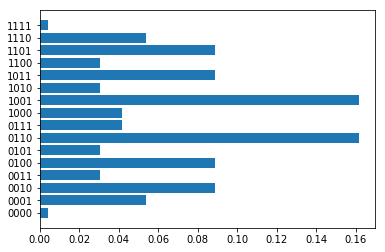

In [12]:
plot_state_histogram(states_with_probs)

### For faster noise-free simulation

In [13]:
measurements = WavefunctionSimulator().run_and_measure(prog, trials=1000)

In [14]:
# Result in decreasing order
from collections import Counter
measurements = [tuple(measurement) for measurement in measurements]
measurements_counter = Counter(measurements)
measurements_counter.most_common()

[((0, 1, 1, 0), 163),
 ((1, 0, 0, 1), 151),
 ((0, 0, 1, 0), 114),
 ((1, 1, 0, 1), 94),
 ((1, 0, 1, 1), 93),
 ((0, 1, 0, 0), 86),
 ((1, 0, 0, 0), 47),
 ((1, 1, 1, 0), 43),
 ((0, 0, 0, 1), 42),
 ((0, 1, 1, 1), 41),
 ((0, 1, 0, 1), 37),
 ((1, 0, 1, 0), 32),
 ((0, 0, 1, 1), 27),
 ((1, 1, 0, 0), 22),
 ((1, 1, 1, 1), 5),
 ((0, 0, 0, 0), 3)]

In [15]:
wf = WavefunctionSimulator().wavefunction(prog)
wf = wf.amplitudes
print(wf)

[-0.02261538-0.05950891j  0.17965025+0.14639111j  0.03650877-0.2959579j
 -0.11353684+0.13334859j  0.03650877-0.2959579j  -0.11353684+0.13334859j
 -0.25667831-0.30900042j -0.16175255+0.12458291j -0.16175255+0.12458291j
 -0.25667831-0.30900042j -0.11353684+0.13334859j  0.03650877-0.2959579j
 -0.11353684+0.13334859j  0.03650877-0.2959579j   0.17965025+0.14639111j
 -0.02261538-0.05950891j]


In [16]:
print("Probability amplitudes for all the possible states:")
for state_index in range(inst_maxcut.nstates):
    print(inst_maxcut.states[state_index], wf[state_index])

Probability amplitudes for all the possible states:
0000 (-0.022615381822590513-0.05950891357590428j)
0001 (0.17965024629531914+0.1463911050673306j)
0010 (0.03650877274000856-0.2959579035347011j)
0011 (-0.1135368402945828+0.13334859243649316j)
0100 (0.03650877274000858-0.29595790353470103j)
0101 (-0.11353684029458287+0.13334859243649322j)
0110 (-0.2566783138498933-0.3090004161655386j)
0111 (-0.161752548958261+0.12458290920675126j)
1000 (-0.161752548958261+0.12458290920675126j)
1001 (-0.2566783138498933-0.3090004161655386j)
1010 (-0.11353684029458287+0.13334859243649322j)
1011 (0.03650877274000858-0.29595790353470103j)
1100 (-0.1135368402945828+0.13334859243649316j)
1101 (0.03650877274000856-0.2959579035347011j)
1110 (0.17965024629531914+0.1463911050673306j)
1111 (-0.022615381822590513-0.05950891357590428j)


In [17]:
print("Probabilities of measuring given states:")
states_with_probs = []
for state_index in range(inst_maxcut.nstates):
    states_with_probs.append([inst_maxcut.states[state_index], np.real(np.conj(wf[state_index])*wf[state_index])])
    print(states_with_probs[-1][0], states_with_probs[-1][1])

Probabilities of measuring given states:
0000 0.004052766289966002
0001 0.05370456663680306
0010 0.08892397115163703
0011 0.030672461208871564
0100 0.088923971151637
0101 0.03067246120887159
0110 0.16136501399130038
0111 0.041684788360912245
1000 0.041684788360912245
1001 0.16136501399130038
1010 0.03067246120887159
1011 0.088923971151637
1100 0.030672461208871564
1101 0.08892397115163703
1110 0.05370456663680306
1111 0.004052766289966002


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_state_histogram(states_with_probs):
    states = np.array(states_with_probs)[:,0]
    probs = np.array(states_with_probs)[:,1].astype(float)
    n = len(states_with_probs)
    plt.barh(range(n), probs, tick_label=states)
    plt.show()

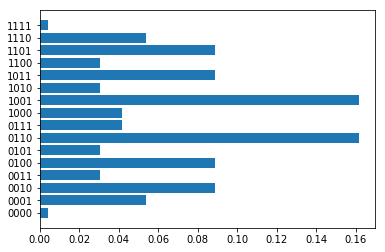

In [19]:
plot_state_histogram(states_with_probs)